<a href="https://colab.research.google.com/github/digital-science/dimensions-api-lab/blob/master/3-workshops/2019-09-Rome-University-ISSI-conference/6-Rome-Researchers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Dimensions API Lab In Google Colab"/></a>

# 5. Researchers  

This Notebook shows how it's possible to extract researchers data related to  Rome University programmatically, using the Dimensions API with Jupyter Notebooks. 


In [1]:
!pip install dimcli plotly_express  -U

     |████████████████████████████████| 122kB 9.0MB/s 
  Created wheel for json2html: filename=json2html-1.3.0-cp36-none-any.whl size=7594 sha256=f2b4a932af74686279b361e8caff05609b50c1adf9ac50f21d2c2847eb5b5366
  Stored in directory: /root/.cache/pip/wheels/58/36/ad/386be30507bcb8f0c9830004bd776132eba63c1b945ed79255
Successfully built json2html


In [5]:
# common libraries
import pandas as pd
from pandas.io.json import json_normalize
import time
from tqdm import tqdm_notebook as tqdm
import plotly_express as px
from getpass import getpass
# FINALLY..
import dimcli
from dimcli.shortcuts import *

##
# LOG IN 
##

user = "m.pasin@digital-science.com"  #@param {type: "string"}
password = getpass('Enter password here')
print('=> username is', user)
print('=> password is', "*" * len(password))
dimcli.login(user, password)

##
# OBJECTS 
##
%load_ext google.colab.data_table
dsl = dimcli.Dsl()


Enter password here··········
=> username is m.pasin@digital-science.com
=> password is **************
DimCli v0.5.7 - Succesfully connected to <https://app.dimensions.ai> (method: manual login)
The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


In [ ]:
%load_ext google.colab.data_table

Dimensions data source are mined for organizations identifiers using GRID, the [Global Research Identifier Database](https://grid.ac/). So we can use GRID IDs to perform searches across all source in Dimensions. 

The GRID ID for Rome La Sapienza is [grid.7841.a](https://grid.ac/institutes/grid.7841.a). 


In [ ]:
GRIDID = "grid.7841.a"

## Researchers currently affiliated to this university, by number of publications

In [7]:
data = dslquery(f"""search researchers where 
current_research_org="{GRIDID}" and obsolete=0 
return researchers[basics+total_publications] sort by total_publications limit 100""")
df = data.as_dataframe()
df["full_name"] = df["first_name"] + " " + df["last_name"]
df.head(10)

Returned Researchers: 100 (total = 19940)


first_name                  id  ... total_publications            full_name
0        Shahram  ur.013334067161.01  ...               1102     Shahram Rahatlou
1         Egidio  ur.016577466761.29  ...               1024         Egidio Longo
2  Torello Maria   ur.01004616634.01  ...                891  Torello Maria Lotti
3       Fabrizio  ur.015522075720.46  ...                857   Fabrizio Margaroli
4        Massimo    ur.0603163377.07  ...                848        Massimo Volpe
5        Stefano  ur.011001734565.36  ...                777        Stefano Giagu
6          Guido   ur.01360745012.13  ...                762       Guido Valesini
7       Riccardo    ur.0744774354.40  ...                714     Riccardo Faccini
8       Maurizio   ur.01351106567.44  ...                691     Maurizio Brunori
9      Salvatore   ur.01140361036.11  ...                684  Salvatore Cucchiara

[10 rows x 7 columns]

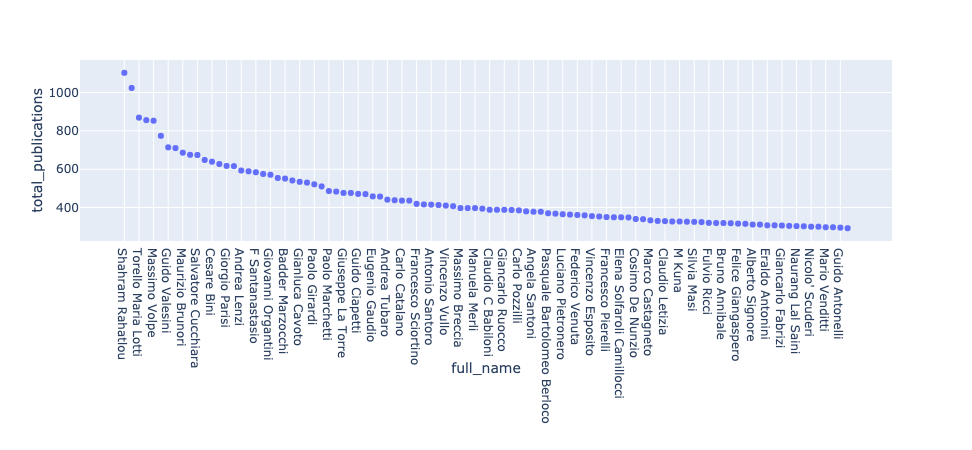

In [ ]:
px.scatter(df, x="full_name", y="total_publications", hover_name="full_name", 
           hover_data=['id', 'total_publications'], 
           height=600, title="")

## Researchers affiliated to this university (at any time), by number of publications

In [ ]:
data = dslquery(f"""search researchers where research_orgs="{GRIDID}" 
and obsolete=0 return researchers[basics+total_publications] sort by total_publications limit 100""")
df = data.as_dataframe()
df["full_name"] = df["first_name"] + " " + df["last_name"]
df.head(10)

Returned Researchers: 100 (total = 35726)


first_name                  id   last_name               orcid_id  \
0             Y Huda   ur.01010756664.44   Shoenfeld                    NaN   
1            Antonio   ur.01327132640.85  Gasbarrini                    NaN   
2       Claus Detlef  ur.012561241352.36    Claussen                    NaN   
3  Giovanni Battista    ur.0655503040.12  Gasbarrini                    NaN   
4         Alfred W B    ur.0734455677.90     Forchel  [0000-0002-9377-9935]   
5       Thomas Felix    ur.0641760460.60     Lüscher                    NaN   
6        Carlo Maria   ur.01114633117.26       Croce                    NaN   
7           Giovanni    ur.0640734655.22     Scambia                    NaN   
8         Gian Carlo  ur.014170451002.23        Comi                    NaN   
9            Massimo    ur.0776664553.33     Filippi  [0000-0002-5485-0479]   

                                       research_orgs  total_publications  \
0  [{'id': 'grid.10737.32', 'name': 'Nice Sophia ...                1907   
1  [{'id': 'grid.39936.36', 'acronym': 'CUA', 'na...                1634   
2  [{'id': 'grid.10392.39', 'name': 'University o...                1423   
3  [{'id': 'grid.419843.3', 'name': 'Oasi Maria S...                1401   
4  [{'id': 'grid.10392.39', 'name': 'University o...                1389   
5  [{'id': 'grid.7400.3', 'acronym': 'UZH', 'name...                1374   
6  [{'id': 'grid.452350.5', 'acronym': 'IHS', 'na...                1353   
7  [{'id': 'grid.18147.3b', 'name': 'University o...                1345   
8  [{'id': 'grid.18147.3b', 'name': 'University o...                1228   
9  [{'id': 'grid.410345.7', 'name': 'Ospedale San...                1220   

                      full_name  
0              Y Huda Shoenfeld  
1            Antonio Gasbarrini  
2         Claus Detlef Claussen  
3  Giovanni Battista Gasbarrini  
4            Alfred W B Forchel  
5          Thomas Felix Lüscher  
6             Carlo Maria Croce  
7              Giovanni Scambia  
8               Gian Carlo Comi  
9               Massimo Filippi

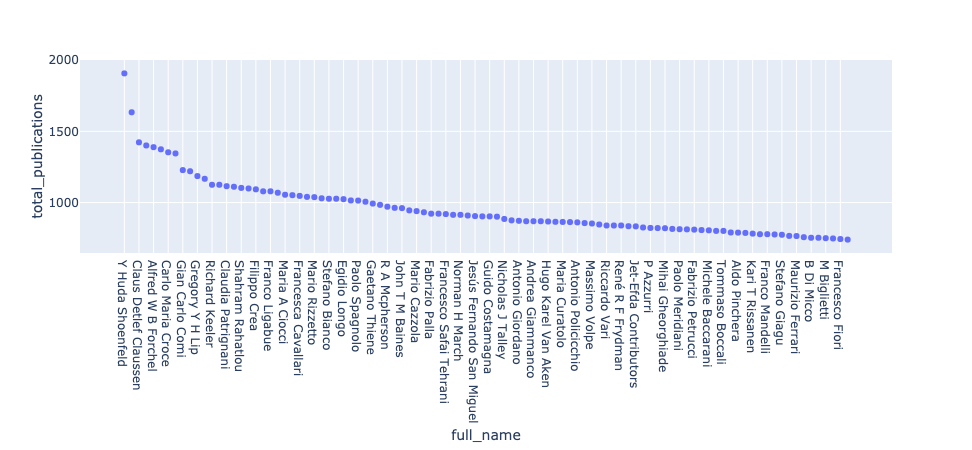

In [ ]:
px.scatter(df, x="full_name", y="total_publications", hover_name="full_name", 
           hover_data=['id', 'total_publications'], 
           height=600, title="")

## Combining and comparing 'current' VS 'all-time' top researchers

In order to do this, let's add the `current_research_org` value to the result, so that we can pivot on it in our visualization. 

In [ ]:
data = dslquery(f"""search researchers where research_orgs="{GRIDID}" and obsolete=0 
                return researchers[basics+total_publications+current_research_org] sort by total_publications limit 100""")
df = data.as_dataframe()
df["full_name"] = df["first_name"] + " " + df["last_name"]

Returned Researchers: 100 (total = 35726)


Let's plot the top 100

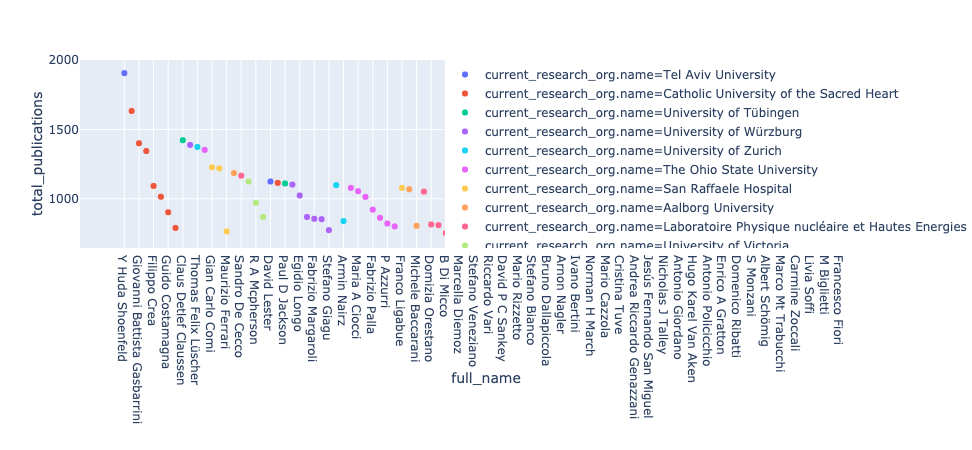

In [ ]:
px.scatter(df[:100], x="full_name", y="total_publications", hover_name="full_name", color="current_research_org.name",
           hover_data=['id', 'total_publications'], 
           height=600, title="")

## Where did researchers move to?

By using the `current_research_org` value we can get a quick overview of where high-publishing researchers who used to be at the University of Rome are now.

In order to have a more complete picture, this time we take the top 1000 researchers. 


In [ ]:
data = dslquery(f"""search researchers where research_orgs="{GRIDID}" and obsolete=0 and current_research_org is not empty
                return researchers[basics+total_publications+current_research_org] sort by total_publications limit 1000""")
df = data.as_dataframe()
df = df.rename(columns={"current_research_org.name": "org_name", "current_research_org.country_name": "org_country"})
df = df.fillna("empty") # fill empty values with a string
df["full_name"] = df["first_name"] + " " + df["last_name"]

Returned Researchers: 1000 (total = 32981)


Let's remove Rome University from this set 

In [ ]:
df_minus_rome = df[df['current_research_org.id'] != GRIDID]

Now let's plot the data based on the other current research orgs

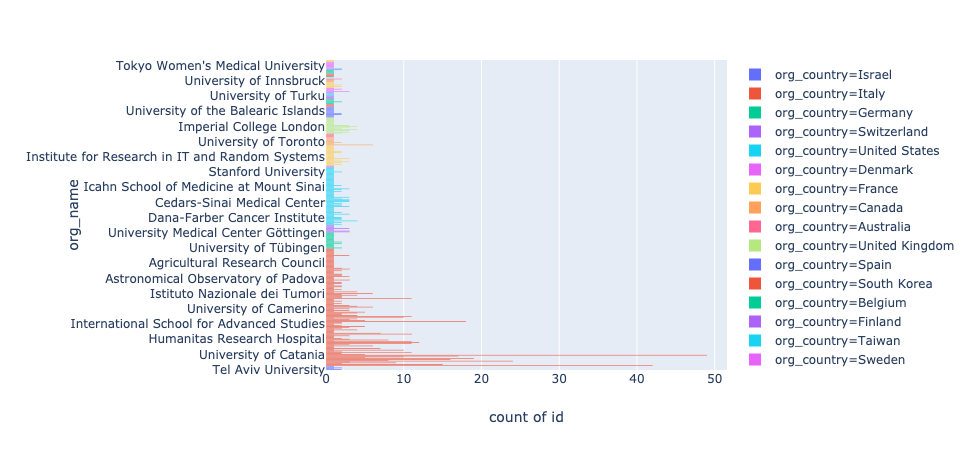

In [ ]:
px.histogram(df_minus_rome, x="id", y="org_name", color="org_country",
             orientation='h', hover_name="org_name", hover_data=['current_research_org.id'])

## Where did top-performing (based on publications count) researchers move to?

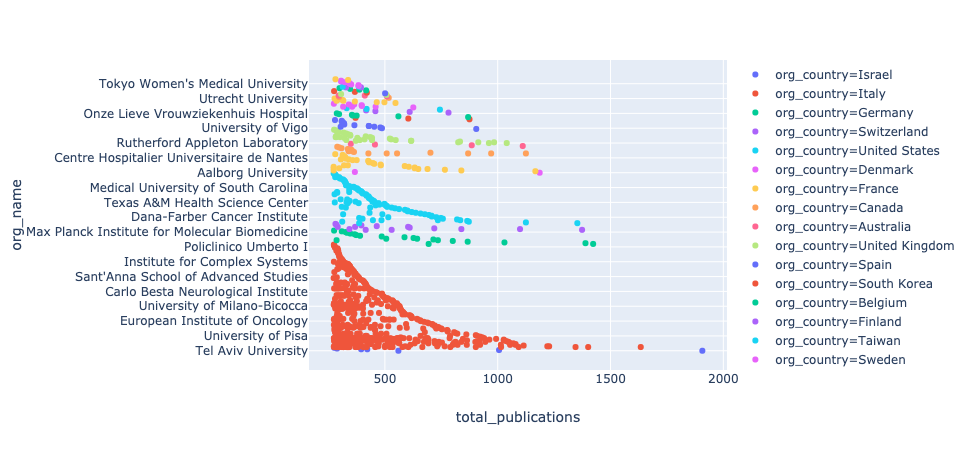

In [ ]:
px.scatter(df_minus_rome, y="org_name", x="total_publications",  hover_name="full_name", 
           color="org_country", hover_data=['id', 'total_publications'], height=600, title="")

---
# Activities

* Try repeating the same analysis for a different organization listed in the [Global Research Identifier Database](https://grid.ac/)
* Try modifying the initial result set eg by adding a keyword search `search publications for "malaria" ...` and see how results change

---
# Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 